<a href="https://colab.research.google.com/github/pradeep198429/Neural-Networks-/blob/main/Copy_of_neural_network_classification_forestfire_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("sample_data/forestfires.csv")


#df_new=pd.get_dummies(df,columns={'month','day','size_category'},drop_first=True)
#print(df_new)
df.drop(['month','day'], axis=1,inplace=True)
df['size_category'].replace({"small": 0,"large" : 1},inplace=True)
df.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

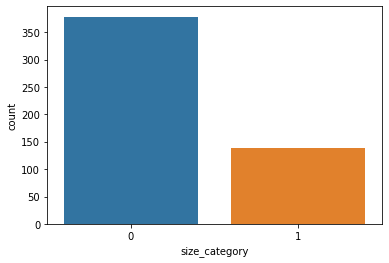

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X = df.drop('size_category',axis=1).values
y = df['size_category'].values

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='size_category',data=df)
plt.show()
# to check class imbalance 


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
X_train_res.shape,y_train_res.shape

X_train=X_train_res.copy()
y_train=y_train_res.copy()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




```
# This is formatted as code
```



In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

model = Sequential()

model.add(Dense(units=17,activation='relu'))
model.add(Dense(units=17,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))


# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )
y_pred = model.predict_classes(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(confusion_matrix(y_test,y_pred))

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


Epoch 1/600
18/18 [==============================] - 0s 7ms/step - loss: 0.7009 - val_loss: 0.7190
Epoch 2/600
18/18 [==============================] - 0s 2ms/step - loss: 0.6919 - val_loss: 0.6951
Epoch 3/600
18/18 [==============================] - 0s 2ms/step - loss: 0.6862 - val_loss: 0.6899
Epoch 4/600
18/18 [==============================] - 0s 2ms/step - loss: 0.6820 - val_loss: 0.6850
Epoch 5/600
18/18 [==============================] - 0s 2ms/step - loss: 0.6773 - val_loss: 0.6804
Epoch 6/600
18/18 [==============================] - 0s 2ms/step - loss: 0.6727 - val_loss: 0.6781
Epoch 7/600
18/18 [==============================] - 0s 2ms/step - loss: 0.6690 - val_loss: 0.6751
Epoch 8/600
18/18 [==============================] - 0s 2ms/step - loss: 0.6647 - val_loss: 0.6718
Epoch 9/600
18/18 [==============================] - 0s 2ms/step - loss: 0.6605 - val_loss: 0.6703
Epoch 10/600
18/18 [==============================] - 0s 2ms/step - loss: 0.6565 - val_loss: 0.6721
Epoch 11/